<a href="https://colab.research.google.com/github/ghulammahiyudin/vehicle_maintenance_prediction/blob/main/Vehicle_Maintenance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing liberies
pip install imbalanced-learn pandas scikit-learn matplotlib

In [ ]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load your dataset
df = pd.read_csv('/content/vehicle_maintenance_data.csv')

In [ ]:
# Step 2: Define feature columns and target column
feature_columns = [
    'Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
    'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
    'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
    'Owner_Type', 'Insurance_Premium', 'Service_History', 'Accident_History',
    'Fuel_Efficiency', 'Tire_Condition', 'Brake_Condition', 'Battery_Status'
]

target_column = 'Need_Maintenance'

In [ ]:
# Step 3: Separate features and target
X = df[feature_columns]
y = df[target_column]


In [ ]:
# Step 4: Handle missing values
X_encoded = X.copy()

# Fill missing values for numerical columns with median
numerical_cols = X_encoded.select_dtypes(include=['float64', 'int64']).columns
X_encoded[numerical_cols] = X_encoded[numerical_cols].fillna(X_encoded[numerical_cols].median())

# Fill missing values for categorical columns with mode
categorical_cols = X_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_encoded[col] = X_encoded[col].fillna(X_encoded[col].mode()[0])

In [ ]:
# Step 5: Encode categorical columns
le_mapping = {}  # To store mappings for each column
le = LabelEncoder()

for col in categorical_cols:
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Save the mappings


Text(0, 0.5, 'Number of Samples')

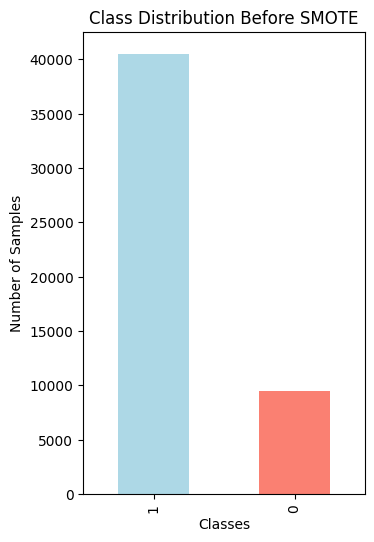

In [ ]:
# Step 6: Visualize class distribution before SMOTE
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')

In [ ]:
# Step 7: Apply SMOTE to balance the target variable
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

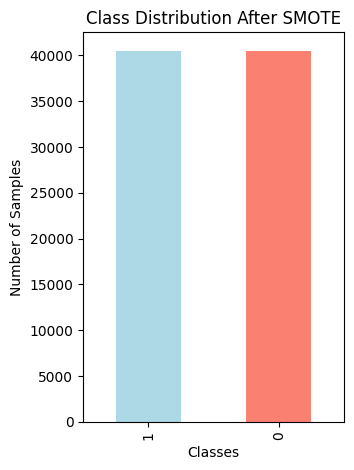

In [ ]:
# Step 8: Visualize class distribution after SMOTE
plt.subplot(1, 2, 2)
y_resampled.value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Step 9: Convert numerical columns back to original categories
X_resampled_df = pd.DataFrame(X_resampled, columns=X_encoded.columns)

for col in categorical_cols:
    reverse_mapping = {v: k for k, v in le_mapping[col].items()}  # Reverse the mapping
    X_resampled_df[col] = X_resampled_df[col].map(reverse_mapping)

# Ensure the number of columns remains the same
assert X_resampled_df.shape[1] == X_encoded.shape[1], "Number of columns mismatch!"

In [ ]:
# Step 10: Combine the balanced features with the target variable
balanced_df = X_resampled_df.copy()
balanced_df[target_column] = y_resampled

In [ ]:
# Step 11: Save the balanced dataset as a CSV file
balanced_df.to_csv('balanced_vehicle_maintenance_data_original_format.csv', index=False)


In [ ]:
# Step 12: Provide an option to download the file
try:
    from google.colab import files
    files.download('balanced_vehicle_maintenance_data_original_format.csv')
except ImportError:
    print("The file 'balanced_vehicle_maintenance_data_original_format.csv' has been saved locally.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>